In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")

# print("Path to dataset files:", path)

In [3]:
path = '/Users/ankeshkumar/.cache/kagglehub/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/versions/2'

In [4]:
path += '/Loan.csv'

In [5]:
df = pd.read_csv(path)
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [6]:
df['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [7]:
df['ApplicationYear'] = df['ApplicationDate'].map(lambda x: x.split('-')[0])
df['ApplicationMonth'] = df['ApplicationDate'].map(lambda x: x.split('-')[1])
df['ApplicationDate'] = df['ApplicationDate'].map(lambda x: x.split('-')[2])

In [8]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,ApplicationYear,ApplicationMonth
0,01,45,39948,617,Employed,Master,22,13152,48,Married,...,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,2018,01
1,02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,2018,01
2,03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,2018,01
3,04,58,69084,545,Employed,High School,34,37898,96,Single,...,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,2018,01
4,05,37,103264,594,Employed,Associate,17,9184,36,Married,...,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,2018,01


## Encoding Some Labels

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

In [11]:
df['EmploymentStatus'] = label_encoder.fit_transform(df['EmploymentStatus'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['EducationLevel'] = label_encoder.fit_transform(df['EducationLevel'])
df['HomeOwnershipStatus'] = label_encoder.fit_transform(df['HomeOwnershipStatus'])
df['LoanPurpose'] = label_encoder.fit_transform(df['LoanPurpose'])

In [12]:
df['HomeOwnershipStatus'].value_counts()

HomeOwnershipStatus
0    7939
3    6087
2    3938
1    2036
Name: count, dtype: int64

In [13]:
df['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [14]:
df.describe()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,0.217750,1.894300,17.522750,24882.867800,54.057000,1.25970,1.517300,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,0.556283,1.415566,11.316836,13427.421217,24.664857,0.76183,1.386325,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,0.000000,0.000000,3674.000000,12.000000,0.00000,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,0.000000,1.000000,9.000000,15575.000000,36.000000,1.00000,0.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,0.000000,1.000000,17.000000,21914.500000,48.000000,1.00000,1.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,0.000000,3.000000,25.000000,30835.000000,72.000000,2.00000,2.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,2.000000,4.000000,61.000000,184732.000000,120.000000,3.00000,5.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


## Looking for Correlation

In [16]:
corr_matrix = df.corr()
corr_matrix['LoanApproved'].sort_values(ascending=False)

LoanApproved                  1.000000
MonthlyIncome                 0.604101
AnnualIncome                  0.597900
NetWorth                      0.187892
TotalAssets                   0.184011
CreditScore                   0.142000
Age                           0.141029
Experience                    0.140755
LengthOfCreditHistory         0.105949
PaymentHistory                0.030804
EducationLevel                0.019650
JobTenure                     0.004997
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
SavingsAccountBalance         0.000961
CheckingAccountBalance        0.000660
DebtToIncomeRatio             0.000034
ApplicationDate              -0.000923
NumberOfOpenCreditLines      -0.004769
ApplicationYear              -0.005496
NumberOfCreditInquiries      -0.005885
MaritalStatus                -0.006828
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
ApplicationMonth             -0.011251
HomeOwnershipStatus      

array([[<Axes: xlabel='RiskScore', ylabel='RiskScore'>,
        <Axes: xlabel='MonthlyIncome', ylabel='RiskScore'>,
        <Axes: xlabel='AnnualIncome', ylabel='RiskScore'>,
        <Axes: xlabel='LoanApproved', ylabel='RiskScore'>,
        <Axes: xlabel='TotalDebtToIncomeRatio', ylabel='RiskScore'>,
        <Axes: xlabel='InterestRate', ylabel='RiskScore'>],
       [<Axes: xlabel='RiskScore', ylabel='MonthlyIncome'>,
        <Axes: xlabel='MonthlyIncome', ylabel='MonthlyIncome'>,
        <Axes: xlabel='AnnualIncome', ylabel='MonthlyIncome'>,
        <Axes: xlabel='LoanApproved', ylabel='MonthlyIncome'>,
        <Axes: xlabel='TotalDebtToIncomeRatio', ylabel='MonthlyIncome'>,
        <Axes: xlabel='InterestRate', ylabel='MonthlyIncome'>],
       [<Axes: xlabel='RiskScore', ylabel='AnnualIncome'>,
        <Axes: xlabel='MonthlyIncome', ylabel='AnnualIncome'>,
        <Axes: xlabel='AnnualIncome', ylabel='AnnualIncome'>,
        <Axes: xlabel='LoanApproved', ylabel='AnnualIncome'>,
    

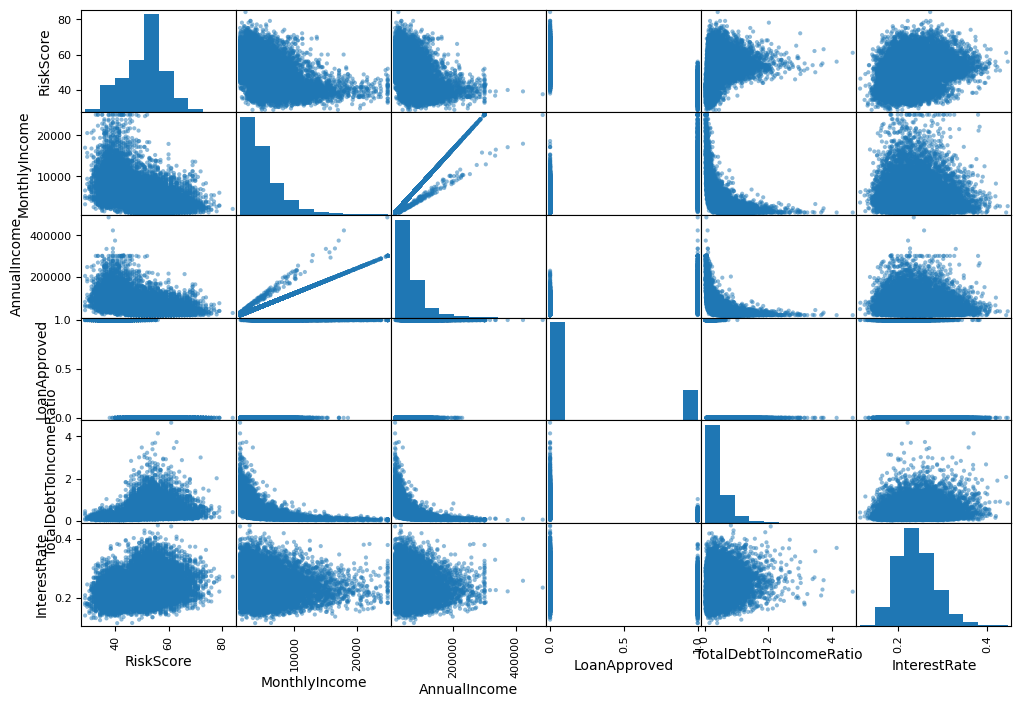

In [17]:
# Monthly & RiskScore shows the most significant correlation with LoanApproval
from pandas.plotting import scatter_matrix

attributes = ['RiskScore', 'MonthlyIncome', 'AnnualIncome', 'LoanApproved', 'TotalDebtToIncomeRatio', 'InterestRate']
scatter_matrix(df[attributes], figsize=(12, 8))

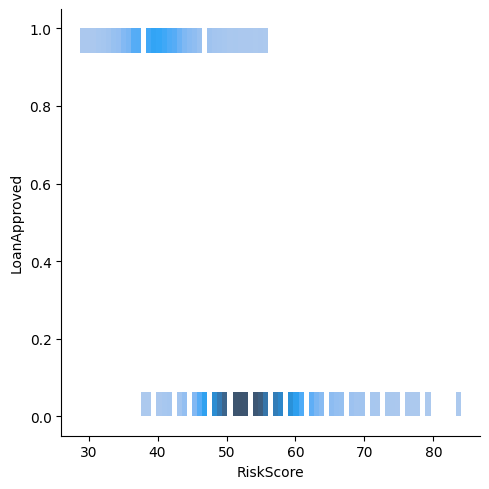

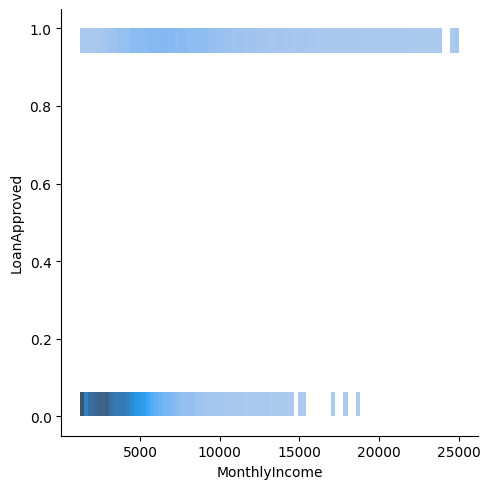

In [34]:
sns.displot(data=df, x="RiskScore", y="LoanApproved")
sns.displot(data=df, x="MonthlyIncome", y="LoanApproved")

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)

for train_index, test_index in split.split(df, df['LoanApproved']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

## Observing the balanced splitting of Data

In [19]:
strat_train_set['LoanApproved'].value_counts()[0] / strat_train_set['LoanApproved'].value_counts()[1]

3.18357789572276

In [20]:
strat_test_set['LoanApproved'].value_counts()[0] / strat_test_set['LoanApproved'].value_counts()[1]

3.185161699429296

In [21]:
X_train = strat_train_set.drop('LoanApproved', axis=1).copy()
X_test = strat_test_set.drop('LoanApproved', axis=1).copy()
y_train = strat_train_set['LoanApproved']
y_test = strat_test_set['LoanApproved']

## Training the model

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from random import randint

In [23]:
## Preprunning
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [24]:
model = DecisionTreeClassifier()
cv = GridSearchCV(model, param_grid=parameter, cv=5, scoring='accuracy')

In [25]:
cv.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [26]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [27]:
np.array(y_test[:20])

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [28]:
y_pred = cv.predict(X_test)

In [29]:
y_pred[:20]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [31]:
score = accuracy_score(y_pred, y_test)

In [32]:
score

0.97

In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5083
           1       0.92      0.95      0.94      1517

    accuracy                           0.97      6600
   macro avg       0.95      0.96      0.96      6600
weighted avg       0.97      0.97      0.97      6600

